# Temas Tratados en el Trabajo Práctico 6

* Modelado de problemas en espacios de estado.

* Algoritmos de planificación hacia adelante y hacia atrás.

* Representación y solución de problemas descritos en lenguaje STRIPS.

* Algoritmo GRAPHPLAN.

* Planificación con restricciones de tiempo y recursos.

* Caminos críticos y tiempos de relajación.

## Ejercicios Teóricos

1. ¿En qué tipo de algoritmos se basa un planificador para encontrar el mejor camino a un estado solución?

1. **Búsqueda en el espacio de estados hacia adelante**
Parte de estado inicial y enlista las acciones que hacen evolucionar los posibles estados hasta llegar al estado objetivo. 
**Desventajas:**
* No es práctico: Debe recorrer todo el espacio de estados, lo que puede consumir muchos recursos.
* no toma en cuenta el "peso" de las acciones: para esta búsqueda, dos planificaciones "pesan" lo mismo aunque una pueda consumir más recursos.

![Búsqueda fordward](Imagenes/busquedaadelante.png)

2. **Búsqueda en el espacio de estados hacia atrás**
Acá, el planificador parte del estado objetivo y arma una lista de acciones hasta llegar al estado inicial.
**Desventajas:**
* Difícil de implementar
* No siempre es obvio cómo generar los estados predecesores del
conjunto de estados objetivo.
**Ventajas:**
* Permite considerar acciones **relevantes**
* Permite considerar acciones **consistentes**: acciones que no deshacen los literales deseados


![Búsqueda backward](Imagenes/busquedaatras.png)

3. **Búsqueda en el espacio de planes: Planificación de orden total**
Se define una acción en base a la entrada o **precondición** y a la salida o **efecto** de la acción.
La búsqueda consiste en añadir acciones al plan de manera que las precondiciones de cada acción estén cubiertas por los efectos de otras acciones. Se debe definir:
- Inicio: Precondición **nula**, efecto **Estado Inicial**
- Finalizar: Precondicion **Estado Objetivo**, efecto **nulo**

El plan es una secuencia lineal de acciones, totalmente ordenadas. Se define la siguiente acción en base a la precondición, que es efecto de la acción anterior.

![Planificación de orden total](Imagenes/plantotal.png)

4. **Búsqueda en el espacio de planes: Planificación de orden parcial(POP)**
Se ramifica cada vez que una acción futura necesita efectos que deben ser generados por acciones previas. Cada rama representa una alternativa de cómo lograr esos efectos, manteniendo solo los órdenes necesarios entre acciones.
Se toma una acción cuya precondición no está satisfecha, luego busca acciones que puedan producir esos efectos y las añade al plan creando restricciones de orden necesarias

![POP](Imagenes/POP.png)

5. **Algoritmo de Graphplan**
* Primero se chequea si todos los literales del objetivo están presentes en el nivel actual sin que existan enlaces mutuamente excluyentes entre cualquier par de ellos.
* Luego se extiende el grafo añadiendo acciones para el nivel actual y literales de estado para el siguiente nivel.
* El proceso continúa hasta que una solución sea encontrada o se compruebe que la solución no existe.



2. ¿Qué tres elementos se encuentran dentro de una acción formulada en lenguaje STRIPS? Describa brevemente qué función cumple cada uno.

- **Nombre de Acción y Lista de Parámetros**: Cumple la función de describir el proceso que se seguirá y los parámetros que lo describen.
- **Precondición**: Es una unión de literales positivos que establecen lo que debe cumplirse para que pueda llevarse adelante cierta acción.
- **Efecto**: Es una union de literales positivos que establecen el estado posterior a la ejecución de la acción.

3. Describa las ventajas y desventajas de desarrollar un algoritmo de planificación hacia adelante y hacia atrás en el espacio de estados.


| Tipo de planificación        | Ventajas                        | Desventajas                       |
|-------------------------------|---------------------------------|----------------------------------|
| **Hacia adelante (forward)**  | Simple, fácil implementación, compatible con heurísticas | Muchas acciones irrelevantes, ineficiente sin heurística, mismo "peso" para todas las acciones posibles |
| **Hacia atrás (backward)**    | Filtra acciones irrelevantes, eficiente en problemas grandes | Objetivo debe estar bien definido, múltiples ramas posibles, complejo de implementar |


4. Considere el problema de ponerse uno mismo zapatos y medias. Aplique **GRAPHPLAN** a este problema y muestre la solución obtenida. Muestre el plan de orden parcial que es solución e indique cuántas linealizaciones diferentes existen para el plan de orden parcial.

Ordenes de restricción mínimas: 
* En(MD, PD) < En(ZD, PD)
* En(MI, PI) < En(ZI, PI)

Entonces nuestro estado inicial se reduce a lo figurado en el grafo. Si por cada estado inicial pueden salir 3 linealizaciones, tendremos 6(3 ramas posibles * 2 ramas iniciales) linealizaciones posibles.

![medias y zapatillas](Imagenes/Ej4Graphplan.png)

5. Se requiere ensamblar una máquina cuyas piezas están identificadas con las letras A, B, C, D y E. El tiempo que se tarda en ensamblar cada pieza es:

* A: 2 semanas

* B: 1 semana

* C: 4 semanas

* D: 3 semanas

* E: 5 semanas

    El orden de ensamblaje de cada pieza requiere que:

* A esté realizado antes que C

* B esté realizado antes que C

* B esté realizado antes que D

* C esté realizado antes que E

* D esté realizado antes que E

    Con esta información:

        5.1 Arme el Plan de Orden Parcial.

        5.2 Encuentre el Camino Crítico.

        5.3 Encuentre los tiempos de relajación.

        5.4 Dibuje un diagrama temporal indicando las tareas y los tiempos de relajación encontrados.

5.1 **Plan de Orden Parcial**
A continuación se puede ver el Plan de Orden Parcial simplificado:

![Plan de Orden Parcial.png](<attachment:Plan de Orden Parcial.png>)

Se procede a desarrollar el diagrama a partir de los tiempos asignados a cada tarea

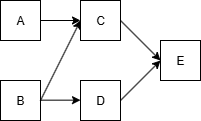

## Ejercicios de Implementación

6. Suponga que tiene un robot de oficina capaz de moverse y tomar y depositar objetos. El robot solo puede tener un objeto a la vez, pero puede conseguir una *caja* en la que depositar varios objetos. Suponga que programa al robot para *ir a la tienda* a comprarle un *café* y en el camino de vuelta tome una *carta* del *buzón* de la oficina para para que se la traiga junto con el café. Describa en lenguaje STRIPS:

        6.1 El dominio del robot (nombre, predicados y acciones que puede hacer el robot).

        6.2 El problema que se quiere resolver (estado inicial, estado objetivo y objetos del mundo representados).

        6.3 Introduzca el código desarrollado en los puntos anteriores en el [planificador online](http://lcas.lincoln.ac.uk/fast-downward/) y obtenga el plan de acción que tomará el robot para cumplir lo solicitado.


# Bibliografía

[Russell, S. & Norvig, P. (2004) _Inteligencia Artificial: Un Enfoque Moderno_. Pearson Educación S.A. (2a Ed.) Madrid, España](https://www.academia.edu/8241613/Inteligencia_Aritificial_Un_Enfoque_Moderno_2da_Edici%C3%B3n_Stuart_J_Russell_y_Peter_Norvig)

[Poole, D. & Mackworth, A. (2023) _Artificial Intelligence: Foundations of Computational Agents_. Cambridge University Press (3a Ed.) Vancouver, Canada](https://artint.info/3e/html/ArtInt3e.html)